In [ ]:
# Python
import pandas as pd
from prophet import Prophet

In [ ]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwtv83k7q/vxp3fl01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwtv83k7q/aknum86n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63795', 'data', 'file=/tmp/tmpwtv83k7q/vxp3fl01.json', 'init=/tmp/tmpwtv83k7q/aknum86n.json', 'output', 'file=/tmp/tmpwtv83k7q/prophet_modelim04fs58/prophet_model-20240513194543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:45:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:45:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.436930,8.935514
3266,2017-01-16,8.535122,7.817334,9.297854
3267,2017-01-17,8.322549,7.581799,9.004723
3268,2017-01-18,8.155179,7.479743,8.846775
3269,2017-01-19,8.167136,7.453139,8.856318


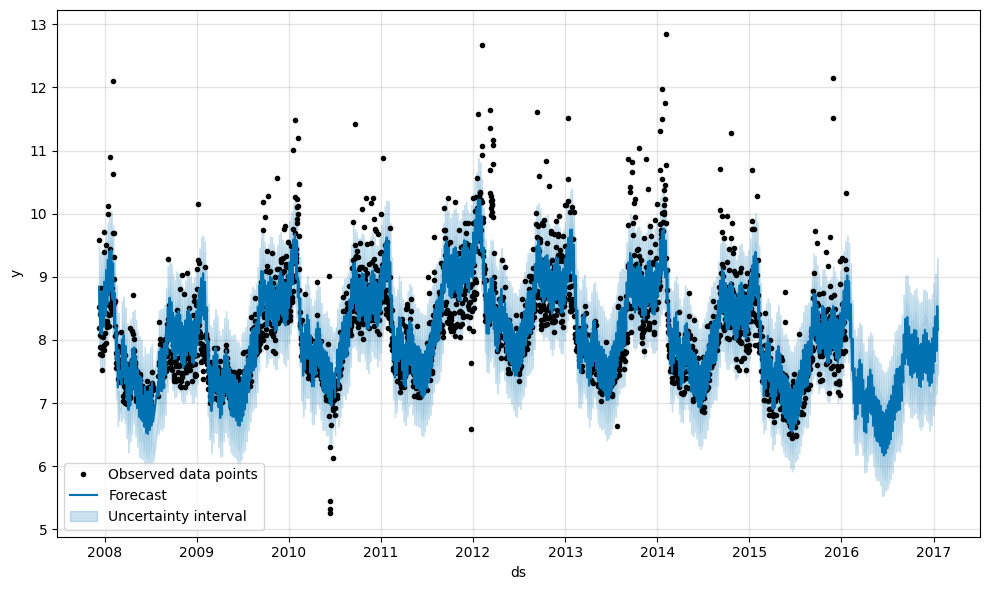

In [ ]:
# Python
fig1 = m.plot(forecast,include_legend=True)

In [ ]:
# Python
fig2 = m.plot_components(forecast)

TypeError: Prophet.plot_components() got an unexpected keyword argument 'include_legend'

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

#plot_plotly(m, forecast,uncertainty=True)
plot_plotly(m, forecast,uncertainty=False)

In [ ]:
# Python
plot_components_plotly(m, forecast)